<a href="https://colab.research.google.com/github/iceman011/mydeeplearning/blob/master/ez_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import torch
from torch import nn
import torch.nn.functional as F
import time
from datetime import datetime as dt
import datetime
import os
import pdb
import sys
import torchvision.models as pretrained_models

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
  
from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from collections import OrderedDict

from torch import optim
import itertools
#!/usr/bin/env python3
import mmap
import re
from itertools import dropwhile, product

import numpy as np

from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision

print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

class Network(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers,output_classes,transform,dataset, drop_p=0.5,lr =0.001, train_on_gpu=False,network_type ='normal',replace_full_classifier=False):
        ''' Builds a feedforward network with arbitrary hidden layers.
        
            Arguments
            ---------
            input_size: integer, size of the input layer
            output_size: integer, size of the output layer
            hidden_layers: list of integers, the sizes of the hidden layers
        
        '''
        super().__init__()
        if train_on_gpu:
          # check if CUDA is available
          self.train_on_gpu = torch.cuda.is_available()

        if not self.train_on_gpu:
            print('CUDA is not available.  Using CPU ...')
        else:
            print('CUDA is available!  Using GPU ...')
        
        print('init Network with Type ',network_type)
        if(network_type == 'normal'):
          
          self.input_size = input_size
          # Input to a hidden layer
          self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_layers[0])])
          
          # Add a variable number of more hidden layers
          layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
          self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])
          
          self.output = nn.Linear(hidden_layers[-1], output_size)
          
          self.dropout = nn.Dropout(p=drop_p)
        else:
          self.init_pre_trained_model(hidden_layers,network_type,output_size,replace_full_classifier)

        self.output_size = output_size
        self.learning_rate = lr
        self.drop_ratio = drop_p
        self.output_classes = output_classes
        self.transform = transform
        self.dataset = dataset
        self.network_type = network_type
        self.replace_full_classifier = replace_full_classifier

        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        layers = []
        if(self.network_type == 'normal' ):
          layers = self.hidden_layers
        elif self.replace_full_classifier == True :
          layers = self.classifier
        #else:
        #  x = self.classifier(x)

        for each in layers:
          x = F.relu(each(x))
          x = self.dropout(x)        
        
        x = self.output(x)
        return F.log_softmax(x, dim=1)

    #https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html#model-training-and-validation-code
    def init_pre_trained_model(self,hidden_layers,network_type,output_size,replace_full_classifier):
        #print('init Network with Type ',network_type)
        if ( network_type == 'alexnet'):
            self.pre_trained_model = pretrained_models.alexnet(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.classifier[6] = nn.Linear(self.pre_trained_model.classifier[6].in_features,output_size)
            self.input_size = self.pre_trained_model.classifier[6].in_features
        elif ( network_type == 'vgg11'):
            self.pre_trained_model = pretrained_models.vgg11(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.classifier[6] = nn.Linear(self.pre_trained_model.classifier[6].in_features,output_size)
            self.input_size = self.pre_trained_model.classifier[6].in_features
        elif ( network_type == 'vgg11_bn'):
            self.pre_trained_model = pretrained_models.vgg11_bn(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.classifier[6] = nn.Linear(self.pre_trained_model.classifier[6].in_features,output_size)
            self.input_size = self.pre_trained_model.classifier[6].in_features
        elif ( network_type == 'vgg13'):
            self.pre_trained_model = pretrained_models.vgg13(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.classifier[6] = nn.Linear(self.pre_trained_model.classifier[6].in_features,output_size)
            self.input_size = self.pre_trained_model.classifier[6].in_features
        elif ( network_type == 'vgg13_bn'):
            self.pre_trained_model = pretrained_models.vgg13_bn(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.classifier[6] = nn.Linear(self.pre_trained_model.classifier[6].in_features,output_size)
            self.input_size = self.pre_trained_model.classifier[6].in_features
        elif ( network_type == 'vgg16'):
            self.pre_trained_model = pretrained_models.vgg16(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.classifier[6] = nn.Linear(self.pre_trained_model.classifier[6].in_features,output_size)
            self.input_size = self.pre_trained_model.classifier[6].in_features
        elif ( network_type == 'vgg16_bn'):
            self.pre_trained_model = pretrained_models.vgg16_bn(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.classifier[6] = nn.Linear(self.pre_trained_model.classifier[6].in_features,output_size)
            self.input_size = self.pre_trained_model.classifier[6].in_features
        elif ( network_type == 'vgg19'):
            self.pre_trained_model = pretrained_models.vgg19(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.classifier[6] = nn.Linear(self.pre_trained_model.classifier[6].in_features,output_size)
            self.input_size = self.pre_trained_model.classifier[6].in_features
        elif ( network_type == 'vgg19_bn'):
            self.pre_trained_model = pretrained_models.vgg19_bn(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.classifier[6] = nn.Linear(self.pre_trained_model.classifier[6].in_features,output_size)
            self.input_size = self.pre_trained_model.classifier[6].in_features
        elif ( network_type == 'resnet18'):
            self.pre_trained_model = pretrained_models.resnet18(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.fc = nn.Linear(self.pre_trained_model.fc.in_features,output_size)
            self.input_size = self.pre_trained_model.fc.in_features
        elif ( network_type == 'resnet34'):
            self.pre_trained_model = pretrained_models.resnet34(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.fc = nn.Linear(self.pre_trained_model.fc.in_features,output_size)
            self.input_size = self.pre_trained_model.fc.in_features
        elif ( network_type == 'resnet50'):
            self.pre_trained_model = pretrained_models.resnet50(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.fc = nn.Linear(self.pre_trained_model.fc.in_features,output_size)
            self.input_size = self.pre_trained_model.fc.in_features
        elif ( network_type == 'resnet101'):
            self.pre_trained_model = pretrained_models.resnet101(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.fc = nn.Linear(self.pre_trained_model.fc.in_features,output_size)
            self.input_size = self.pre_trained_model.fc.in_features
        elif ( network_type == 'resnet152'):
            self.pre_trained_model = pretrained_models.resnet152(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.fc = nn.Linear(self.pre_trained_model.fc.in_features,output_size)
            self.input_size = self.pre_trained_model.fc.in_features
        elif ( network_type == 'squeezenet1_0'):
            self.pre_trained_model = pretrained_models.squeezenet1_0(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.classifier[1] = nn.Conv2d(512, output_size, kernel_size=(1,1), stride=(1,1))
            self.input_size = 512
        elif ( network_type == 'squeezenet1_1'):
            self.pre_trained_model = pretrained_models.squeezenet1_1(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.classifier[1] = nn.Conv2d(512, output_size, kernel_size=(1,1), stride=(1,1))
            self.input_size = 512
        elif ( network_type == 'densenet121'):
            self.pre_trained_model = pretrained_models.densenet121(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.classifier = nn.Linear(self.pre_trained_model.classifier.in_features, output_size)
            self.input_size = self.pre_trained_model.classifier.in_features
        elif ( network_type == 'densenet169'):
            self.pre_trained_model = pretrained_models.densenet169(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.classifier = nn.Linear(self.pre_trained_model.classifier.in_features, output_size)
            self.input_size = self.pre_trained_model.classifier.in_features
        elif ( network_type == 'densenet161'):
            self.pre_trained_model = pretrained_models.densenet161(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.classifier = nn.Linear(self.pre_trained_model.classifier.in_features, output_size)
            self.input_size = self.pre_trained_model.classifier.in_features
        elif ( network_type == 'densenet201'):
            self.pre_trained_model = pretrained_models.densenet201(pretrained=True)
            self.freeze_parameters()
            self.pre_trained_model.classifier = nn.Linear(self.pre_trained_model.classifier.in_features, output_size)
            self.input_size = self.pre_trained_model.classifier.in_features
        #elif ( network_type == 'inception_v3'):
        #    self.pre_trained_model = pretrained_models.inception_v3(pretrained=True)
        #    self.input_size = model.fc.in_features

        """    
        #print(model)
        # here we get all the modules(layers) before the fc layer at the end
        # note that currently at pytorch 1.0 the named_children() is not supported
        # and using that instead of children() will fail with an error
        self.features = nn.ModuleList(model.children())[:-1]

        # Now we have our layers up to the fc layer, but we are not finished yet 
        # we need to feed these to nn.Sequential() as well, this is needed because,
        # nn.ModuleList doesnt implement forward() 
        # so you cant do sth like self.features(images). Therefore we use 
        # nn.Sequential and since sequential doesnt accept lists, we 
        # unpack all the items and send them like this
        self.features = nn.Sequential(*self.features)

        # now lets add our new layers 
        #in_features = model.fc.in_features

        hidden_layers = [item for item in hidden_layers]
        hidden_layers.insert(0,self.input_size)

        self.hidden_layers = hidden_layers
        self.network_type = network_type
      """
        # replace last layer of classifier completely with new fully connected dynamic hidden layers  
        if(replace_full_classifier) :
          self.classifier, self.output = self.make_dynamic_layers(hidden_layers,output_size)
        
        
    def parameters_to_update(model_ft,network_type):
      if(network_type == 'normal' ):
        params_to_update = model_ft.parameters()
      print("Params to learn:")
      if network_type != 'normal' :
          params_to_update = []
          for name,param in model_ft.pre_trained_model.named_parameters():
              if param.requires_grad == True:
                  params_to_update.append(param)
                  print("\t",name)
      else:
          for name,param in model_ft.named_parameters():
              if param.requires_grad == True:
                  print("\t",name)
      return params_to_update

    def freeze_parameters(self):
      # Freeze parameters so we don't backprop through them
      print('Original Model : ',self.pre_trained_model)
      for param in self.pre_trained_model.parameters():
        param.requires_grad = False

    def make_dynamic_layers(self,layers,n_classes):
        layers_block = nn.Sequential(*[
                                    nn.Sequential(
                                        nn.Linear(in_f, out_f),
                                        nn.ReLU(),
                                        nn.Dropout()
                                        ) 
                          for in_f, out_f in zip(layers, layers[1:])])
        
        output = nn.Linear(layers[-1], n_classes)
        
        return layers_block,output

"""
class PreTrainenModels(nn.Module):
      
      def __init__(self, input_size, output_size, hidden_layers,output_classes,transform,dataset, drop_p=0.5,lr =0.001, train_on_gpu=False,network_type ='normal'):
        
        super().__init__()
        
        if ( network_type == 'resnet18'):
          #assert input_size == 1024 ,  'input features of pre-trained networks must bet 1024'
          model = pretrained_models.resnet18(pretrained=True)
          input_size = model.fc.in_features
          
        #print(model)
        # here we get all the modules(layers) before the fc layer at the end
        # note that currently at pytorch 1.0 the named_children() is not supported
        # and using that instead of children() will fail with an error
        self.features = nn.ModuleList(model.children())[:-1]

        # Now we have our layers up to the fc layer, but we are not finished yet 
        # we need to feed these to nn.Sequential() as well, this is needed because,
        # nn.ModuleList doesnt implement forward() 
        # so you cant do sth like self.features(images). Therefore we use 
        # nn.Sequential and since sequential doesnt accept lists, we 
        # unpack all the items and send them like this
        self.features = nn.Sequential(*self.features)

        # now lets add our new layers 
        in_features = model.fc.in_features

        # from now, you can add any kind of layers in any quantity!  
        # Here I'm creating two new layers 
        #self.fc0 = nn.Linear(in_features, 256)
        #self.fc0_bn = nn.BatchNorm1d(256, eps = 1e-2)
        #self.fc1 = nn.Linear(256, output_size)
        #self.fc1_bn = nn.BatchNorm1d(output_size, eps = 1e-2)
        
        # initialize all fc layers to xavier
        #for m in self.modules():
        #    if isinstance(m, nn.Linear):
        #        torch.nn.init.xavier_normal_(m.weight, gain = 1)
        
        hidden_layers = [item for item in hidden_layers]
        hidden_layers.insert(0,in_features)

        self.hidden_layers = hidden_layers
        
        self.classifier, self.output = classifier_block(hidden_layers,output_size) #MyPreTrainedClassifier(hidden_layers,output_size)
        
        #self.model = model
        #self.model.last_linear= self.classifier
        #self.output = nn.Linear(hidden_layers[-1], output_size)
        #self.dropout = nn.Dropout(p=drop_p)

        self.classifier = nn.Sequential(OrderedDict([
                                  ('fc1', nn.Linear(in_features, 500)),
                                  ('relu', nn.ReLU()),
                                  ('fc2', nn.Linear(500, output_size)),
                                  ('output', nn.LogSoftmax(dim=1))
                                  ]))
           
        #model.classifier = classifier

        # Freeze parameters so we don't backprop through them
        for param in model.parameters():
            param.requires_grad = False

        if train_on_gpu:
          # check if CUDA is available
          self.train_on_gpu = torch.cuda.is_available()

        if not self.train_on_gpu:
            print('CUDA is not available.  Using CPU ...')
        else:
            print('CUDA is available!  Using GPU ...')
            
        
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = lr
        self.drop_ratio = drop_p
        self.output_classes = output_classes
        self.transform=transform
        self.dataset=dataset
        self.network_type= network_type


      def get_dense_net(self):        
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = None

        if ( self.network_type == 'densenet121'):
          assert self.input_size == 1024 ,  'input features of pre-trained networks must bet 1024'
          model = pretrained_models.densenet121(pretrained=True)

        # Freeze parameters so we don't backprop through them
        for param in model.parameters():
            param.requires_grad = False
            
        model.classifier = nn.Sequential(nn.Linear(self.input_size, 256),
                                        nn.ReLU(),
                                        nn.Dropout(self.drop_ratio),
                                        nn.Linear(256, self.output_size),
                                        nn.LogSoftmax(dim=1))

        criterion = nn.NLLLoss()

        # Only train the classifier parameters, feature parameters are frozen
        optimizer = optim.Adam(model.classifier.parameters(), lr=self.learning_rate)

        model.to(device)
        
        return model , criterion , optimizer


      def forward(self, x):
        #return self.model(x)
       # now in forward pass, you have the full control, 
       # we can use the feature part from our pretrained model  like this
        #x = self.features(x)

        # since we are using fc layers from now on, we need to flatten the output.
        # we used the avgpooling but we still need to flatten from the shape (batch, 1,1, features)
        # to (batch, features) so we reshape like this. input_imgs.size(0) gives the batchsize, and 
        # we use -1 for inferring the rest
        #output = output.view(input_imgs.size(0), -1)
       # and also our new layers. 
        #output = self.fc0_bn(F.relu(self.fc1(output)))
        #output = self.fc1_bn(F.relu(self.fc1(output)))
        
        x = self.classifier(x)

        #x = F.relu(self.classifier.fc1(x))
        #x = self.dropout(x)
        #x = F.relu(self.classifier.fc2(x))
        #x = self.dropout(x)
        #x = self.classifier.output(x)
        x = self.output(x)

        return F.log_softmax(x, dim=1)
        #return x




class MyPreTrainedClassifier(nn.Module):

    def __init__(self, classifier_sizes, n_classes):
        super().__init__()
        self.classifier = nn.Sequential(*[classifier_block(in_f, out_f) 
                       for in_f, out_f in zip(classifier_sizes, classifier_sizes[1:])])
        self.output = nn.Linear(classifier_sizes[-1], n_classes)

    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        for each in self.hidden_layers:
            x = F.relu(each(x))
            x = self.dropout(x)
        x = self.output(x)
        
        return F.log_softmax(x, dim=1)

    def forward_last(self, x):
      x = self.classifier(x)
      x = self.output(x)

      for each in self.hidden_layers:
        x = F.relu(each(x))
        x = self.dropout(x)
        x = self.output(x)
      
      return F.log_softmax(x, dim=1)

"""

######################    
# LOADING DATA #
######################
def LoadData(datasetName,batch_size=20,valid_size = 0.2,network_type='normal'):
      
    # number of subprocesses to use for data loading
    num_workers = 0

    # convert data to torch.FloatTensor
    #transform = transforms.ToTensor()

    # convert data to a normalized torch.FloatTensor
    transform = None
    train_data= None
    valid_data= None
    test_data=None
    classes=None
    normalize = None

    if network_type != 'normal' :
      normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    elif network_type == 'normal' and datasetName == 'MINST' :
      normalize = transforms.Normalize((0.5, ), (0.5, ))
    elif network_type == 'normal' and datasetName == 'CIFAR' :
      normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

    if(datasetName == 'MINST'):
       # convert data to a normalized torch.FloatTensor
      train_transform = transforms.Compose([
          transforms.RandomHorizontalFlip(), # randomly flip and rotate
          #transforms.RandomRotation(10),
          transforms.CenterCrop(224),  
          transforms.RandomResizedCrop(224),        
          transforms.ToTensor(),
          normalize
          ])

      valid_transform = transforms.Compose([
          transforms.ToTensor(),
          transforms.Resize(224),
          normalize
          ])

      # choose the training and test datasets
      train_data = datasets.MNIST(root='data', train=True,
                                        download=True, transform=train_transform)
      valid_data = datasets.MNIST(root='data', train=False,
                                        download=True, transform=valid_transform)
      test_data = datasets.MNIST(root='data', train=False,
                                        download=True, transform=valid_transform)
      # specify the image classes
      classes = ['1', '2', '3', '4', '5',
           '6', '7', '8', '9', '10']
    elif(datasetName == 'CIFAR'):
      
      # convert data to a normalized torch.FloatTensor
      valid_transform = transforms.Compose([
          transforms.ToTensor(),
          #transforms.Resize(224),
          normalize
          ])
      
      train_transform = transforms.Compose([
          transforms.RandomHorizontalFlip(), # randomly flip and rotate
          transforms.RandomRotation(10),
          transforms.CenterCrop(224),
          transforms.RandomResizedCrop(224),
          transforms.ToTensor(),
          normalize
          ])
      
      # choose the training and test datasets
      train_data = datasets.CIFAR10(root='data', train=True,
                                        download=True, transform=train_transform)
      valid_data = datasets.CIFAR10(root='data', train=True,
                                        download=True, transform=valid_transform)
      test_data = datasets.CIFAR10(root='data', train=False,
                                        download=True, transform=valid_transform)
      # specify the image classes
      classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

    # obtain training indices that will be used for validation
    num_train = len(train_data)
    indices = list(range(num_train))
    np.random.shuffle(indices)
    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[split:], indices[:split]

    # define samplers for obtaining training and validation batches
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)

    # prepare data loaders
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
        sampler=train_sampler, num_workers=num_workers)
    valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
        sampler=valid_sampler, num_workers=num_workers)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
        num_workers=num_workers)
    return train_loader , valid_loader ,test_loader ,classes , transform



#############################
# VALIDATE MODEL
############################
def validation(model, validationloader, criterion):
    accuracy = 0
    validation_loss = 0
    validate_start_time = time.time()

    print(dt.now().strftime("%d_%b_%Y_%H_%M_%S")+' : ','Starting Validation....')

    base_model = model

    if(model.network_type != 'normal'):
      base_model = model.pre_trained_model

    with torch.no_grad():    
      # move tensors to GPU if CUDA is available
      if model.train_on_gpu:
        base_model.cuda()

      for images, labels in validationloader:

          if model.train_on_gpu:
            images, labels = images.cuda(), labels.cuda()
          
          if model.network_type == 'normal' or model.replace_full_classifier == True:
            images = images.resize_(images.size()[0], model.input_size)
            output = model.forward(images)
          else:
            output = base_model.forward(images)


          
          validation_loss += criterion(output, labels).item()

          ## Calculating the accuracy 
          # Model's output is log-softmax, take exponential to get the probabilities
          ps = torch.exp(output)
          # Class with highest probability is our predicted class, compare with true label
          #equality = (labels.data == ps.max(1)[1])
          # Accuracy is number of correct predictions divided by all predictions, just take the mean
          #accuracy += equality.type_as(torch.FloatTensor()).mean()


          top_p, top_class = ps.topk(1, dim=1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))            
        
      validation_loss = validation_loss/len(validationloader)
      accuracy = 100. * accuracy/len(validationloader)
    
    print('Finished Validation In ',datetime.timedelta(seconds = time.time() - validate_start_time) )
    return validation_loss, accuracy

#############################
# TEST MODEL
############################
def test(model,test_loader,criterion,checkpoint,outputfilepath,batch_size,override_checkpoint):
    # track test loss
    test_loss = 0.0
    class_correct = list(0. for i in range(model.output_size))
    class_total = list(0. for i in range(model.output_size))
    test_start_time = time.time()

    print(dt.now().strftime("%d_%b_%Y_%H_%M_%S")+' : Starting Testing....')

    base_model = model

    if(model.network_type != 'normal'):
      base_model = model.pre_trained_model

    # move tensors to GPU if CUDA is available
    if model.train_on_gpu:
      base_model.cuda()

    with torch.no_grad():    
      base_model.eval()
      # iterate over test data
      for data, target in test_loader:
          # move tensors to GPU if CUDA is available
          if model.train_on_gpu:
              data, target = data.cuda(), target.cuda()
          
          if model.network_type == 'normal' or model.replace_full_classifier == True:
            # Flatten images into a 784 long vector
            data.resize_(data.size()[0], model.input_size)
            output = model(data)
          else:
            # forward pass: compute predicted outputs by passing inputs to the model
            output = base_model(data)

          # calculate the batch loss
          loss = criterion(output, target)
          # update test loss 
          test_loss += loss.item()*data.size(0)
          # convert output probabilities to predicted class
          _, pred = torch.max(output, 1)    
          # compare predictions to true label
          correct_tensor = pred.eq(target.data.view_as(pred))
          correct = np.squeeze(correct_tensor.numpy()) if not model.train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
          # calculate test accuracy for each object class
          for i in range(batch_size):
              label = target.data[i]
              class_correct[label] += correct[i].item()
              class_total[label] += 1

      # average test loss
      print('Finished Testing during ',datetime.timedelta(seconds=time.time() - test_start_time))
      test_loss = test_loss/len(test_loader.dataset)
      print('Test Loss: {:.6f}\n'.format(test_loss))
      
      test_checkpoint = dict()

      if(override_checkpoint):
        checkpoint.update({'TestLoss': test_loss})
      else :
        test_checkpoint.update({'TestLoss': test_loss})

      for i in range(model.output_size):
          if class_total[i] > 0:
            current_key  = 'Test Accuracy of '+model.output_classes[i]
            current_val = '{:.3f}% ({}/{})'.format(100 *( class_correct[i] / class_total[i]),
                  np.sum(class_correct[i]), np.sum(class_total[i]))
            ele={current_key:current_val}
            if(override_checkpoint):
              checkpoint.update(ele)
              print(current_key,current_val)
            else:
              test_checkpoint.update(ele)


          """else:
              print('Test Accuracy of %5s: N/A (no training examples)' % (model.output_classes[i]))
          """

      current_key = 'Test Accuracy (Overall): '#.format(100. * np.sum(class_correct) / np.sum(class_total))
      current_val = '{:.3f}% ({}/{})'.format(100 * (np.sum(class_correct) / np.sum(class_total)),
          np.sum(class_correct), np.sum(class_total) )
      ele={current_key:current_val}
      if(override_checkpoint):
        checkpoint.update(ele)      
        print(current_key,current_val)
      else:
        test_checkpoint.update(ele)
        test_checkpoint.update({'Detailed ':checkpoint})

    
    #model.train()
    if(override_checkpoint):
      print('Overriding Checkpoint')
      torch.save(checkpoint,outputfilepath)

    return checkpoint , test_checkpoint

#############################
# TRAIN MODEL
############################
def train(model, trainloader, validationloader, criterion, optimizer, uploadToGDrive,checkpointPath,PreviousCheckPointId,
          PreviousValidationLoss,start_time,exp_id,epochs=5, print_every=40):
    # monitor training loss    
    steps = 0    
    #start_time = time.time()
    #dateTimeObj = datetime.now()
    #start_time_timestamp = './results/'+dateTimeObj.strftime("%d_%b_%Y_%H_%M_%S")
    #start_time_timestamp = dateTimeObj.strftime("%d_%b_%Y_%H_%M_%S")
    train_losses, valid_losses = [], []
    checkpoint = dict()
    base_model = model

    if(model.network_type != 'normal'):
      base_model = model.pre_trained_model


    # move tensors to GPU if CUDA is available
    if model.train_on_gpu and model.network_type != 'normal' and model.replace_full_classifier == False :
      base_model.cuda()
    else:
      model.cuda()

    print(dt.now().strftime("%d_%b_%Y_%H_%M_%S")+' : Starting Training using Model Parameters \n '+str(base_model)+' \n from PreviousModel '+ PreviousCheckPointId + ' with validationLoss '+ str(PreviousValidationLoss) )
    valid_loss_min = PreviousValidationLoss #np.Inf # set initial "min" to infinity

    for e in range(epochs):        
        train_loss = 0.0
        valid_loss = 0.0
        epoch_start_time = time.time()

        print(dt.now().strftime("%d_%b_%Y_%H_%M_%S")+' : Starting Training of Epoch'+str(e)  )
        ###################
        # train the model #
        ###################
        base_model.train() # prep model for training

        for images, labels in trainloader:
            steps += 1
            
            # move tensors to GPU if CUDA is available
            if model.train_on_gpu:
              images, labels = images.cuda(), labels.cuda()

            optimizer.zero_grad()

            if model.network_type == 'normal' or model.replace_full_classifier == True:
              # Flatten images into a 784 long vector
              images.resize_(images.size()[0], model.input_size)
              output = model.forward(images)
            else:
              output = base_model.forward(images)
              
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss = train_loss/len(trainloader.sampler)
        train_losses.append(train_loss)
        ######################    
        # validate the model #
        ######################
        # Model in inference mode, dropout is off
        base_model.eval()
        print(' Finished Training of Epoch '+str(e),' In ',datetime.timedelta(seconds = time.time() - epoch_start_time) )

        # Turn off gradients for validation, will speed up inference
        with torch.no_grad():
            valid_loss, accuracy = validation(model, validationloader, criterion)
        
        valid_losses.append(valid_loss)

        print('{} : Epoch: {} \tTraining Loss: {:.9f} \tValidation Loss: {:.9f} \tAccuracy : {:.6f}'.format(
            dt.now().strftime("%d_%b_%Y_%H_%M_%S"),
            e, 
            train_loss,
            valid_loss,
            accuracy
            ))
        
        # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.9f} --> {:.9f} ,)  Accuracy: {:.6f}  TimeElapsed: {}.  Saving model ...'.format(
            valid_loss_min,
            valid_loss,
            accuracy,
            (datetime.timedelta(seconds = time.time() - start_time))))
            
            checkpoint = {'InputSize': model.input_size,
                  'OutputSize': model.output_size,
                  'HiddenLayers': [each.out_features for each in model.hidden_layers] if model.network_type == 'normal' else model.pre_trained_model, 
                  'LearningRate':model.learning_rate,
                  'DropRatio':model.drop_ratio,
                  'TrainingLoss' :train_loss,
                  'ValidationLoss':valid_loss,
                  'ValidationAccuracy':accuracy,
                  'ElapsedTime': datetime.timedelta(seconds = time.time() - start_time),
                  'Dataset':model.dataset,
                  'LastEpoch': e,
                  'PreviousCheckPoint': PreviousCheckPointId,
                  'GPUState': model.train_on_gpu,                  
                  'OutputFolder' : (exp_id+'/'+ model.network_type) if model.network_type != 'normal' else exp_id,
                  'CheckPointTimestamp': dt.now().strftime("%d_%b_%Y_%H_%M_%S"), #time.time(),
                  'OutputFilePrefix' : 'checkpoint_',
                  'OutputClasses': model.output_classes,
                  'NetworkType' : model.network_type,
                  'ReplaceFullClassifier' : model.replace_full_classifier,
                  'Transforms': model.transform,
                  'TrainingLosses' :train_losses,
                  'ValidationLosses':valid_losses,
                  'StateDictionay': base_model.state_dict()}
            
            save_model(checkpoint,uploadToGDrive,checkpointPath)
            valid_loss_min = valid_loss
        
        sys.stdout.flush()

    return train_losses , valid_losses , checkpoint


#############################
# SAVE MODEL TO GOOGLE DRIVE
############################
def save_model(checkpoint,uploadToGDrive,checkpointPath):
  
  file_path = ''
  if(uploadToGDrive):
    drive.mount('/content/gdrive')
    file_path = checkpointPath+checkpoint['OutputFolder']
    if not os.path.exists(file_path):
      os.makedirs(file_path)      
    #path = f'/content/gdrive/My Drive/Colab Notebooks/models/'+dataset+'/'+checkpoint['OutputFolder']+'_'+str(checkpoint['LastEpoch'])+'.pt'
    print('Saving Model to ',file_path +'/'+checkpoint['OutputFilePrefix']+str(checkpoint['CheckPointTimestamp'])+'_'+str(checkpoint['LastEpoch'])+'.pt')
    torch.save(checkpoint, file_path +'/'+checkpoint['OutputFilePrefix']+str(checkpoint['CheckPointTimestamp'])+'_'+str(checkpoint['LastEpoch'])+'.pt')
  else:
    file_path=checkpointPath+checkpoint['OutputFolder']
    if not os.path.exists(file_path):
      os.makedirs(file_path)
    print('Saving Model to ',file_path+'/'+checkpoint['OutputFilePrefix']+str(checkpoint['CheckPointTimestamp'])+'_'+str(checkpoint['LastEpoch'])+'.pt')
    torch.save(checkpoint, file_path+'/'+checkpoint['OutputFilePrefix']+str(checkpoint['CheckPointTimestamp'])+'_'+str(checkpoint['LastEpoch'])+'.pt')


###########################
# SKIP CERTAIN ENTERIES FROM ITERTOOLS.PRODUCT
#####################33
def resume(iterable, sentinel):
    yield from dropwhile(lambda x: x != sentinel, iterable)

#############################
# LOAD LAST EXPERIMENT PARAMS
##################################
def load_last_exp_param(logPath,checkpointPath):

  #with open(checkpointPath+'/3-3-2020.txt') as f:
  #    total = f.read()
  #    print( total.count('Starting New') )
      
  f = open(logPath, 'r')
  content = f.read()
  
  replace_full_classifier = re.findall('ReplaceFullClassifier: \{(.+?)\}', content)
  replace_full_classifier = replace_full_classifier[len(replace_full_classifier)-1]
  replace_full_classifier = replace_full_classifier.strip()

  network_type = re.findall('Network Type: \{(.+?)\}', content)
  network_type = network_type[len(network_type)-1]

  hidden_layers = re.findall('hidden_layers: \{(.+?)\}', content)
  hidden_layers = int(hidden_layers[len(hidden_layers)-1])

  hidden_layer_width = re.findall('hidden_layer_width: \{(.+?)\}', content)
  hidden_layer_width = hidden_layer_width[len(hidden_layer_width)-1]

  Learning_rate = re.findall('Learning_Rate: \{(.+?)\}', content)
  Learning_rate = float(Learning_rate[len(Learning_rate)-1])

  drop_ratio = re.findall('drop_ratio: \{(.+?)\}', content)
  drop_ratio = float(drop_ratio[len(drop_ratio)-1])
  prev_valid_loss = np.Inf
  return_checkpoint = None
  return_model = None

  #for filename in os.listdir(checkpointPath):
  for root, dirs, files in os.walk(checkpointPath):
    for filename in files:
      fname, fext = os.path.splitext(filename)
      if( fext != '.pt' ):
        continue

      model , checkpoint , filepath = load_checkpoint(root,filename[:filename.rfind('_')+1],False,filename[filename.rfind('_')+1:filename.rfind('.')],load_model=True)
      if( float(checkpoint['ValidationLoss']) < prev_valid_loss ):
        prev_valid_loss = checkpoint['ValidationLoss']
      
      
      #pdb.set_trace()
      hidden_layer_width_local = hidden_layer_width.strip()
      if( replace_full_classifier == 'True' and network_type == 'normal') :
        #if(hidden_layer_width_local[len(hidden_layer_width_local)-2:] == ',)'):
        #  hidden_layer_width_local = hidden_layer_width_local[1:len(hidden_layer_width_local)-2]
        #else:
        #  hidden_layer_width_local = hidden_layer_width_local[1:len(hidden_layer_width_local)-1]
        hidden_layer_width_local = list(map(int, hidden_layer_width_local.split(',')))
      else:
        hidden_layer_width_local = [int(hidden_layer_width_local)]

      if( replace_full_classifier == checkpoint.get('ReplaceFullClassifier',False) and network_type == checkpoint['NetworkType'] and hidden_layer_width_local == checkpoint['HiddenLayers'] and float(checkpoint['ValidationLoss']) <= prev_valid_loss ):
        print(' Found Matching Checkpoint with Last Experiement Parame ValidationLoss:{} hidden_layers:{}  hidden_layer_width:{} Learning_rate:{} drop_ratio:{} network_type:{} replace_full_classifier:{} '.format(checkpoint['ValidationLoss'],hidden_layers,hidden_layer_width_local,Learning_rate,drop_ratio,checkpoint['NetworkType'],checkpoint['ReplaceFullClassifier']))
        return_checkpoint = checkpoint
        return_model = model
        prev_valid_loss = checkpoint['ValidationLoss']
        #return checkpoint,model,hidden_layers,hidden_layer_width,Learning_rate,drop_ratio,prev_valid_loss

  if( not bool(return_checkpoint)): 
    print(' Not Found Matching Checkpoint with Last Experiement Parameters hidden_layers:{}  hidden_layer_width:{} Learning_rate:{} drop_ratio:{} network_type:{} replace_full_classifier:{} '.format(hidden_layers,hidden_layer_width_local,Learning_rate,drop_ratio,network_type,replace_full_classifier))    

  return return_checkpoint,return_model,hidden_layers,hidden_layer_width_local,Learning_rate,drop_ratio,prev_valid_loss,network_type,replace_full_classifier

################################
# INITIALIZR TUNE TRAIN NETWORK
##################################
def init_tune_train_network(network_type):

  max_hidden_layers = 4
  nodes_per_layer =  [2048, 1024, 512, 256, 128, 64, 32]
  full_drop_ratios= [0.8, 0.5, 0.3, 0.1]
  full_learning_rates= [0.0001]#, 0.001] #[0.1, 0.01, 0.0001, 0.001]
  full_replace_full_classifier = [False,True]
  
  full_pre_trained_models = ['vgg11','vgg11_bn','vgg13','vgg13_bn','vgg16','vgg16_bn','vgg19','vgg19_bn',
                             'resnet18','resnet34','resnet50','resnet101','resnet152',
                             'squeezenet1_0','squeezenet1_1',
                             'densenet121','densenet169','densenet161','densenet201'
                             #'inception_v3',
                             #'alexnet'
                            ] if network_type != 'normal' else ['normal']
  
  return max_hidden_layers,nodes_per_layer,full_drop_ratios,full_learning_rates,full_replace_full_classifier,full_pre_trained_models
################################
# TUNE NETWORK LAYERS AND NO. OF NODES
##################################
def tune_train_network(dataset,epochs,resumeExp=False,resume_logPath='',resume_checkpointPath='',network_type='normal'):

  start_time = time.time()
  dateTimeObj = dt.now()
  exp_id = dateTimeObj.strftime("%d_%b_%Y_%H_%M_%S")

  #How many samples loaded per batch
  batch_size = 20
  
  # percentage of training set to use as validation
  valid_size = 0.2
  
  checkpointPath = f'/content/gdrive/My Drive/Colab Notebooks/models/'+dataset+'/'
  
  #train_loader =None
  #valid_loader =None
  global_train_loss = None
  global_valid_loss = None
  
  global_train_loss , global_valid_loss, min_train_loss , min_valid_loss = plotLossTrendAll(resume_checkpointPath,True,global_train_loss,global_valid_loss)

  print('Starting Tunning With MinTrainLoss:', min_train_loss, ' MinValidLoss:',min_valid_loss)

  #Load Data
  drive.mount('/content/gdrive')
  train_loader , valid_loader ,test_loader , classes , transform = LoadData(dataset,batch_size,valid_size,network_type)
  
  #Initialize tune parameters
  max_hidden_layers,nodes_per_layer,full_drop_ratios,full_learning_rates,full_replace_full_classifier,full_pre_trained_models = init_tune_train_network(network_type)
  
  hidden_layers_range = max_hidden_layers 
  learning_rates = None
  drop_ratios = None
  pre_trained_models = None
  PreviousValidationLoss= min_valid_loss #np.Inf
  
  iter_hidden_layer_nodes = None
  iter_hidden_layer_nodes_list = None
  model = None
  resume_checkpoint = None

  if(resumeExp):
    print(dt.now().strftime("%d_%b_%Y_%H_%M_%S")+' : Resuming Experiment With New ID ',exp_id )
    resume_checkpoint,model,resum_hidden_layers,resume_hidden_layer_width,resume_Learning_rate,resume_drop_ratio,resume_prev_valid_loss,resume_network_type, resume_replace_full_classifier =  load_last_exp_param(resume_logPath,resume_checkpointPath)
    hidden_layers_range = resum_hidden_layers  

    resume_replace_full_classifier = True if (resume_replace_full_classifier == 'True') else False
    full_replace_full_classifier = full_replace_full_classifier[full_replace_full_classifier.index(resume_replace_full_classifier):]
    learning_rates = full_learning_rates[full_learning_rates.index(resume_Learning_rate):]
    drop_ratios = full_drop_ratios[full_drop_ratios.index(resume_drop_ratio):]
    pre_trained_models = full_pre_trained_models[full_pre_trained_models.index(resume_network_type):]
    PreviousValidationLoss = resume_prev_valid_loss
    checkpointPath = resume_checkpointPath

      #iter_hidden_layer_nodes = resume(itertools.product(nodes_per_layer, repeat=hidden_layers+1), resume_checkpoint['HiddenLayers'])      
    #if(bool(resume_checkpoint)):
    #  model , resume_checkpoint , filepath = load_checkpoint(checkpointPath,filename[:filename.rfind('_')+1],False,filename[filename.rfind('_')+1:filename.rfind('.')])

  global_counter = 0
  for current_replace_full_classifier in full_replace_full_classifier:
    
    # REPLACE CLASSIFIER LAYER IN PRE_TRAINED_MODELS FULLY OR PARTIALLY
    if( network_type != 'normal' and current_replace_full_classifier == False):
      hidden_layers_range = 1
      nodes_per_layer =  nodes_per_layer[len(nodes_per_layer)-1:]
      full_drop_ratios = full_drop_ratios[len(full_drop_ratios)-1:]
    else:
      hidden_layers_range,nodes_per_layer,full_drop_ratios,full_learning_rates,full_replace_full_classifier,full_pre_trained_models = init_tune_train_network(network_type)
  
    #VARY HIDDEN LAEYERS
    for hidden_layers in range(hidden_layers_range,0,-1):
      #VARY HIDDEN LAYER NODES/WIDTH
      iter_hidden_layer_nodes = itertools.product(nodes_per_layer, repeat= hidden_layers)
      iter_hidden_layer_nodes_list = [item for item in iter_hidden_layer_nodes]
      
      if( resumeExp == True and ( network_type == 'normal' or current_replace_full_classifier == True) ):
        iter_hidden_layer_nodes_list = iter_hidden_layer_nodes_list[iter_hidden_layer_nodes_list.index(resume_hidden_layer_width):]
        
      if current_replace_full_classifier == False:
         iter_hidden_layer_nodes_list = resume_hidden_layer_width
      
      if( resumeExp):
        print('Resume ValidationLoss ',PreviousValidationLoss,'Resume Learning Rate Array ',learning_rates ,' Resume Drop Ratio List ',drop_ratios , ' Resume Hidden Nodes List with Size :',len(iter_hidden_layer_nodes_list) , ' Starting From :',iter_hidden_layer_nodes_list[0],' resume Pretrained Model with Size: ',len(pre_trained_models), ' Starting From: ',pre_trained_models[0], ' Resume FullClassifier: ',resume_replace_full_classifier )

      for hidden_layer in iter_hidden_layer_nodes_list:
        #VARY LEARNING RATE
        if( not resumeExp):
          learning_rates = full_learning_rates
        for lr in learning_rates :
          #VARY DROP RATIO
          if( not resumeExp):
            drop_ratios = full_drop_ratios
          for drop_ratio in drop_ratios :
            if( not resumeExp):
              pre_trained_models = full_pre_trained_models
            for pre_trained_model in pre_trained_models :
              print('Start Global Counter: '+str(global_counter)+' Network Type:'+pre_trained_model+' EXP-ID:'+exp_id+'  DurationSinceStart :',datetime.timedelta(seconds = time.time() - start_time),' with hidden_layers:',hidden_layers,' hidden_layer_width:',hidden_layer ,' Learning_Rate:',lr, ' drop_ratio:',drop_ratio, ' replace_full_classifier:',current_replace_full_classifier )
              #model = Network(784, 10, [first_layer, second_layer, third_layer ],classes,transform,dataset, lr=0.001,train_on_gpu=True)

              if( not bool(resume_checkpoint) or not resumeExp ):
                #intput_size = (28*28) if network_type == 'normal' and dataset == 'MINST' else (32*32*3) if network_type == 'normal' and dataset == 'CIFAR' else 1024 # 1024 is defult for pretrained networks
                input_size = 0
                if network_type == 'normal' and dataset == 'MINST':
                  input_size = (28*28) 
                elif network_type == 'normal' and dataset == 'CIFAR' :
                  input_size = (32*32*3)  
                #elif network_type != 'normal' :
                #input_size = 1024 # 1024 is defult for pretrained networks

                #if network_type == 'normal':
                model = Network(input_size, 10, hidden_layer ,classes,transform,dataset,drop_p=drop_ratio,lr =lr,train_on_gpu=True,network_type=pre_trained_model,replace_full_classifier = current_replace_full_classifier)
                #else:
                #  model = PreTrainenModels(input_size, 10, hidden_layer ,classes,transform,dataset,drop_p=drop_ratio,lr =lr,train_on_gpu=True,network_type=network_type)

              if(model.network_type == 'normal' or current_replace_full_classifier == True):
                criterion = nn.NLLLoss()
              else:
                criterion = nn.CrossEntropyLoss()

              #updated only classifier layer in pre-trained models , or all layers in normal networks
              parameters_update = Network.parameters_to_update(model,network_type)
              optimizer = optim.Adam(parameters_update, lr=lr)
              
                #if(dataset == 'MINST'):
                #  model = Network(784, 10, hidden_layer ,classes,transform,dataset,drop_p=drop_ratio,lr =lr,train_on_gpu=True,network_type=network_type)
                #else:
                #  model = Network((32*32*3), 10, hidden_layer ,classes,transform,dataset,drop_p=drop_ratio,lr =lr,train_on_gpu=True,network_type=network_type)

              #Upload checkpoint to local drive
              #train_lossess , valid_lossess , checkpointt = train(model, train_loader, valid_loader, criterion, optimizer, False,checkpointPath,PreviousCheckPointId,PreviousValidationLoss,epochs=100)

              
              train_lossess , valid_lossess , checkpointt = train(model, train_loader, valid_loader, criterion, optimizer, True,checkpointPath,'',PreviousValidationLoss,start_time,exp_id,epochs=epochs)
              if( bool(checkpointt) and checkpointt['ValidationLoss'] < PreviousValidationLoss ):
                PreviousValidationLoss = checkpointt['ValidationLoss']
              
              print('Finished Global Counter: '+str(global_counter)+' %Network Type: {'+pre_trained_model+'}% EXP-ID : '+exp_id+'  DurationSinceStart :',datetime.timedelta(seconds = time.time() - start_time),' with %hidden_layers: {',hidden_layers,'}% %hidden_layer_width: {',hidden_layer ,'}% %Learning_Rate: {',lr, '}% %drop_ratio: {',drop_ratio,'}% %ReplaceFullClassifier: {',current_replace_full_classifier,'}%')
              global_counter+= 1

              #Plot current experiement training vs validation losses
              plotLossTrend(train_lossess,valid_lossess, mode='Single')

              #Plot global training vs validation losses
              key = dataset + '_' + exp_id + '_' + (str(checkpointt['LastEpoch']) if bool(checkpointt) else str(epochs))            
              
              # get minimal loss here , as may be during certain experiment its loss is not less than global loss
              min_loss = np.Inf
              for curr_loss in train_lossess:
                if(curr_loss < min_loss):
                  min_loss = curr_loss
              ele = {key: min_loss}
              global_train_loss.append(ele)
              

              ele = {}
              min_loss = np.Inf
              for curr_loss in valid_lossess:
                if(curr_loss < min_loss):
                  min_loss = curr_loss
              ele = {key: min_loss}
              global_valid_loss.append(ele)

              global_train_loss , global_valid_loss, min_train_loss , min_valid_loss = plotLossTrendAll(resume_checkpointPath,False,global_train_loss,global_valid_loss)
            
            #pdb.set_trace()
            resumeExp=False

#######################
# PLOT LOSS TREND OF TRAINING & VALIDATON OF ALL EXP
##############################3
def plotLossTrendAll(OutputFolder,init,train_loss,valid_loss):

    #OutputFolder = './results/'
    file_epoch = 0
    result_list=[]
    print('Starting Plotting Loss Trend Across All Experiements ....')
    training_loss=[]
    validation_loss=[]
    ele = dict()
    min_train = np.Inf
    min_valid = np.Inf

    """
        for folder in os.listdir(OutputFolder):
          for filename in os.listdir(OutputFolder+folder):
            data = filename.split('_')
            #pdb.set_trace()
            print(data)
            file_epoch=int(data[1][:-3])

            model , checkpoint , filepath = load_checkpoint(OutputFolder+folder,OutputFilePrefix,False,file_epoch)
    """
    if(init):
      for root, dirs, files in os.walk(OutputFolder):
        for filename in files:
          fname, fext = os.path.splitext(filename)
          if( fext != '.pt' ):
            continue

          model , checkpoint , filepath = load_checkpoint(root,filename[:filename.rfind('_')+1],False,filename[filename.rfind('_')+1:filename.rfind('.')],load_model=False)

          key = checkpoint['Dataset'] + '_' + checkpoint['OutputFolder'] + '_' + str(checkpoint['LastEpoch'])
          ele = {key: checkpoint['TrainingLoss']}
          training_loss.append(ele)
          
          ele = {}
          ele ={key: checkpoint['ValidationLoss']}
          validation_loss.append(ele)

          if(checkpoint['ValidationLoss'] < min_valid ):
            min_valid = checkpoint['ValidationLoss']
          if(checkpoint['TrainingLoss'] < min_train ):
            min_train = checkpoint['TrainingLoss']
            
    else:
      training_loss = train_loss
      validation_loss = valid_loss
        
    #print('Result List',result_list)
    plotLossTrend (training_loss,validation_loss,mode='Multiple')

    return training_loss,validation_loss, min_train, min_valid 
      

#############################
# PLOT TRAINING LOSS VS VALIDATION LOSS 
############################
def plotLossTrend(train_losses,validation_losses,test_losses=[],mode='Single'):
  #TRAINING LOSS DATA
  values = []
  labels = []
  
  if(mode !='Single'):
    for item in train_losses:    
      for key, value in item.items():
        values.append("{0:.5f}".format(value)) #= train_losses[:1] #[7, 57, 121, 192, 123, 240, 546]
        labels.append(key) #= train_losses[:0] #['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
  else:
    for epoch in range(len(train_losses)):    
      values.append("{0:.5f}".format(train_losses[epoch])) #= train_losses[:1] #[7, 57, 121, 192, 123, 240, 546]
      labels.append(epoch) #= train_losses[:0] #['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
    #values = train_losses
    #labels = train_losses

  plt.figure(figsize = (12,12))   
  plt.plot(labels,values,label='Training Loss',linestyle='dashed')
  for i,j in zip(labels,values):
      plt.annotate(str(j),xy=(i,j))
  
  plt.xticks(rotation=90)
  #plt.show()

  #VALIDATON LOSS
  values = []
  labels = []
  if(mode !='Single'):
    for item in validation_losses:   
      #pdb.set_trace() 
      for key, value in item.items():      
        values.append("{0:.5f}".format(value)) #= train_losses[:1] #[7, 57, 121, 192, 123, 240, 546]
        labels.append(key) #= train_losses[:0] #['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
  else:
    for epoch in range(len(validation_losses)):    
      values.append("{0:.5f}".format(validation_losses[epoch])) #= train_losses[:1] #[7, 57, 121, 192, 123, 240, 546]
      labels.append(epoch) #= train_losses[:0] #['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

  #plt.figure(figsize = (12,12))   
  plt.plot(labels,values,label='Validation Loss', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
  for i,j in zip(labels,values):
      plt.annotate(str(j),xy=(i,j))
  
  plt.xticks(rotation=90)
  #plt.show()

  #TEST LOSS
  values = []
  labels = []
  for item in test_losses:    
    for key, value in item.items():
      #pdb.set_trace()
      values.append("{0:.5f}".format(value)) #= train_losses[:1] #[7, 57, 121, 192, 123, 240, 546]
      labels.append(key) #= train_losses[:0] #['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

  if(bool(test_losses)):
    plt.title("Training vs Validation vs Testing")
  else:
    plt.title("Training vs Validation")
  if( mode == 'Single' ):
    plt.xlabel("Epochs")
  else:
    plt.xlabel("Expriements")

  #plt.figure(figsize = (12,12))   
  plt.plot(labels,values,label='Test Loss')
  for i,j in zip(labels,values):
      plt.annotate(str(j),xy=(i,j))

  plt.ylabel("Loss")  
  #plt.ylim((0,1.))

  plt.xticks(rotation=90)
  plt.legend()
  plt.show()
  #for i, v in enumerate(values):
  #    ax.text(i, v+25, "%d" %v, ha="center")
  #plt.ylim(-10, 595)

#############################
# LOAD CHECKPOINT
############################
def load_checkpoint(OutputFolder,OutputFilePrefix,max_epoch,exact_epoch,load_model=True):
    
    file_epoch = 0
    if(max_epoch):
      for filename in os.listdir(OutputFolder):
        data = filename.split('_')
        tmp=int(data[1][:-3])
        #print('data[1]',data[1],' tmp[:-3] ',tmp[:-3])
        if( file_epoch <= tmp ):
          file_epoch = tmp
    else:
      file_epoch=exact_epoch

    filepath = OutputFolder+'/'+OutputFilePrefix + str(file_epoch)+'.pt'
    print('Loading Checkpoint from '+filepath+'...')
    indent=1
    
    cpu_or_gpu = torch.cuda.is_available()
    checkpoint = None

    if not cpu_or_gpu :
      checkpoint = torch.load(filepath,map_location='cpu')
    else:
      checkpoint = torch.load(filepath)

    for key, value in checkpoint.items():
        if(key == 'StateDictionay'):
          continue
        print('\t' * indent + str(key),'\t' * (indent+1) + str(value))
        #print('\t' * (indent+1) + str(value))
    
    testmodel = None

    if(load_model ):
      testmodel = Network(    checkpoint['InputSize'],
                              checkpoint['OutputSize'],
                              checkpoint['HiddenLayers'],
                              checkpoint['OutputClasses'],
                              checkpoint['Transforms'],
                              checkpoint['Dataset'],
                              checkpoint['DropRatio'],
                              checkpoint['LearningRate'],
                              train_on_gpu=checkpoint['GPUState'],
                              network_type=checkpoint['NetworkType'],
                              replace_full_classifier = checkpoint.get('ReplaceFullClassifier',False)
                      )
      if(testmodel.network_type == 'normal'):
        testmodel.load_state_dict(checkpoint['StateDictionay'])
      else:
        testmodel.pre_trained_model.load_state_dict(checkpoint['StateDictionay'])
    """elif(load_model and checkpoint['NetworkType'] !='normal' ):
      testmodel = PreTrainenModels(    checkpoint['InputSize'],
                              checkpoint['OutputSize'],
                              checkpoint['HiddenLayers'],
                              checkpoint['OutputClasses'],
                              checkpoint['Transforms'],
                              checkpoint['Dataset'],
                              checkpoint['DropRatio'],
                              checkpoint['LearningRate'],
                              train_on_gpu=checkpoint['GPUState'],
                              network_type=checkpoint['NetworkType']
                      )
    
    print(testmodel.state_dict().keys())
    """


    return testmodel , checkpoint , filepath


def test_all_epochs(OutputFolder,test_loader,criterion,batch_size,OutputFilePrefix='checkpoint_'):

    #OutputFolder = './results/'
    file_epoch = 0
    result_list=[]
    print('Starting Test All Saved Epochs ....')
    trainig_loss=[]
    validation_loss=[]
    test_loss=[]
    ele = dict()

    """
        for folder in os.listdir(OutputFolder):
          for filename in os.listdir(OutputFolder+folder):
            data = filename.split('_')
            #pdb.set_trace()
            print(data)
            file_epoch=int(data[1][:-3])

            model , checkpoint , filepath = load_checkpoint(OutputFolder+folder,OutputFilePrefix,False,file_epoch)
    """
    #for filename in os.listdir(checkpointPath):
    for root, dirs, files in os.walk(OutputFolder):
      for filename in files:
        model , checkpoint , filepath = load_checkpoint(root,filename[:filename.rfind('_')+1],False,filename[filename.rfind('_')+1:filename.rfind('.')],load_model=True)

        checkpoint , checkpoint_test = test(model,test_loader,criterion,checkpoint,filepath,batch_size,False)

        print('Test Accuracy ',checkpoint_test['Test Accuracy (Overall): '])
        result_list.append(checkpoint_test)

        #ele = [list() for f in range(1)] # We have Three Empty Rows
        #ele[0].append(checkpoint['Dataset']+'_'+checkpoint['OutputFolder']+'_'+str(checkpoint['LastEpoch']))
        #ele[0].append(checkpoint['TrainingLoss'])
        key = checkpoint['Dataset'] + '_' + checkpoint['OutputFolder'] + '_' + str(checkpoint['LastEpoch'])
        ele = {key: checkpoint['TrainingLoss']}
        trainig_loss.append(ele)
        
        #ele = [list() for f in range(1)] # We have Three Empty Rows
        #ele[0].append(checkpoint['Dataset']+'_'+checkpoint['OutputFolder']+'_'+str(checkpoint['LastEpoch']))
        #ele[0].append(checkpoint['ValidationLoss'])
        ele = {}
        ele ={key: checkpoint['ValidationLoss']}
        validation_loss.append(ele)

        #ele = [list() for f in range(1)] # We have Three Empty Rows
        #ele[0].append(checkpoint['Dataset']+'_'+checkpoint['OutputFolder']+'_'+str(checkpoint['LastEpoch']))
        #ele[0].append(checkpoint_test['TestLoss'])
        ele = {}
        ele ={key: checkpoint_test['TestLoss']}
        test_loss.append(ele)
    
    #print('Result List',result_list)
    plotLossTrend (trainig_loss,validation_loss,test_loss)
    return result_list
      

#############################
# VISUALIZE ALL IMAGES IN BATCH
############################
def visualize_images_in_batch(loader,batch_size) :
    # obtain one batch of training images
		dataiter = iter(loader)
		images, labels = dataiter.next()
		images = images.numpy()

		# plot the images in the batch, along with the corresponding labels
		fig = plt.figure(figsize=(25, 4))
		for idx in np.arange(batch_size):
			ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
			ax.imshow(np.squeeze(images[idx]), cmap='gray')
			# print out the correct label for each image
			# .item() gets the value contained in a Tensor
			ax.set_title(str(labels[idx].item()))
		return images

#############################
# VISUALIZE ALL RGB IMAGES IN BATCH
############################
def visualize_rgb_images_in_batch(train_loader):
  # obtain one batch of training images
  dataiter = iter(train_loader)
  images, labels = dataiter.next()
  images = images.numpy() # convert images to numpy for display
  # plot the images in the batch, along with the corresponding labels
  fig = plt.figure(figsize=(25, 4))
  # display 20 images
  for idx in np.arange(20):
      ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
      #imshow(images[idx])
      img = images[idx]
      img = img / 2 + 0.5  # unnormalize
      plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
      ax.set_title(classes[labels[idx]])



#############################
# VISUALIZE PIXEL OF AN IMAGE RETURN FROM PREV FUNCTION
############################
def visualize_image_pixels_value(image):

  img = np.squeeze(image)
  fig = plt.figure(figsize = (12,12)) 
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape
  thresh = img.max()/2.5
  for x in range(width):
      for y in range(height):
          val = round(img[x][y],2) if img[x][y] !=0 else 0
          ax.annotate(str(val), xy=(y,x),
                      horizontalalignment='center',
                      verticalalignment='center',
                      color='white' if img[x][y]<thresh else 'black')

def visualize_rgb_image_pixels_value(image):
  rgb_img = np.squeeze(image)
  channels = ['red channel', 'green channel', 'blue channel']

  fig = plt.figure(figsize = (36, 36)) 
  for idx in np.arange(rgb_img.shape[0]):
      ax = fig.add_subplot(1, 3, idx + 1)
      img = rgb_img[idx]
      ax.imshow(img, cmap='gray')
      ax.set_title(channels[idx])
      width, height = img.shape
      thresh = img.max()/2.5
      for x in range(width):
          for y in range(height):
              val = round(img[x][y],2) if img[x][y] !=0 else 0
              ax.annotate(str(val), xy=(y,x),
                      horizontalalignment='center',
                      verticalalignment='center', size=8,
                      color='white' if img[x][y]<thresh else 'black')

def visualize_test_results(model,test_loader,batch_size,RGB=False):
  # obtain one batch of test images
  dataiter = iter(test_loader)
  images, labels = dataiter.next()
  images.numpy()

  # move model inputs to cuda, if GPU available
  if model.train_on_gpu:
      images = images.cuda()

  # Flatten images into a 784 long vector
  images.resize_(images.size()[0], model.input_size)

  # get sample outputs
  output = model(images)
  # convert output probabilities to predicted class
  _, preds_tensor = torch.max(output, 1)
  preds = np.squeeze(preds_tensor.numpy()) if not model.train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

  # plot the images in the batch, along with predicted and true labels
  fig = plt.figure(figsize=(25, 4))
  for idx in np.arange(batch_size):
      ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])

      image_cpu = images.cpu()[idx]
      image_cpu = image_cpu / 2 + 0.5  # unnormalize
      if(RGB):
        plt.imshow(np.transpose(image_cpu, (1, 2, 0)))  # convert from Tensor image
      else:
        ax.imshow(np.squeeze(image_cpu), cmap='gray')

      ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                  color=("green" if preds[idx]==labels[idx].item() else "red"))

PyTorch Version:  1.4.0
Torchvision Version:  0.5.0


In [0]:
########################### TEST ALL EPOCHS ##############################
def test_test_all_epochs():
    

  #model , checkpointtt , filepathh = load_checkpoint(checkpointttt['OutputFolder'],checkpointttt['OutputFilePrefix'],False,10)

  #result_list = test_all_epochs(test_loader,criterion,batch_size)

  dataset = 'MINST'


  #How many samples loaded per batch
  batch_size = 20
  # percentage of training set to use as validation
  valid_size = 0.2

  #train_loader =None
  #valid_loader =None
  #Load Data
  dataset = 'MINST'
  train_loader , valid_loader ,test_loader , classes , transform = LoadData(dataset,batch_size,valid_size)


  drive.mount("/content/gdrive", force_remount=True)
  gfolder = '/content/gdrive/My Drive/Colab Notebooks/models/MINST/06_Mar_2020_07_57_24/'

  localfolder = './results/'+dataset+'/'

  result_list = test_all_epochs(gfolder,test_loader,nn.NLLLoss(),batch_size,OutputFilePrefix='checkpoint_')

  #checkpoint = torch.load('/content/drive/My Drive/Colab Notebooks/models/minst/29_Feb_2020_20_06_50_74.pt')

  #print(checkpoint)
  #load_checkpoint('/gdrive/My Drive/Colab Notebooks/models/'+dataset,'29_Feb_2020_20_06_50',False,74)

In [0]:
######################## TEST VISUALIZATION###################
def test_visualize_images_in_batch():
  images = visualize_images_in_batch(train_loader,batch_size)
  visualize_image_pixels_value(images[2])

  model , checkpointtt , filepathh = load_checkpoint(checkpointt['OutputFolder'],checkpointt['OutputFilePrefix'],True,0)

  checkpointttt = test(model,test_loader,criterion,checkpointtt,filepathh,batch_size,True)

  # obtain one batch of test images
  dataiter = iter(test_loader)
  images, labels = dataiter.next()
  images.numpy()

  #visualize_rgb_image_pixels_value(images[2])
  #visualize_test_results(model,test_loader,batch_size)

In [0]:
# Clone github repository setup
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  
#import helper.py
import imp 


################################
# INIT GITHUB
#######################################
def init_github():
  """
  !git init
  !git config — global user.email “ice.man011@gmail.com”
  !git config — global user.name “iceman011”
  !git add -A
  !git commit -m “first commit”
  !git remote add origin https://<username>:<password>github@github.com/iceman011/mydeeplearning.git
  !git push -u origin master
  """
  #!git clone -l -s git://github.com/iceman011/mydeeplearning.git #mydeeplearning-repo
  #!git clone -l -s https://github.com/iceman011@github.com/mydeeplearning.git

  #%cd mydeeplearning-repo
  #!ls

  # path to your project on Google Drive
  #MY_GOOGLE_DRIVE_PATH = 'My Drive/MyDrive/Udacity/deep-learning-v2-pytorch' 
  # replace with your Github username 
  GIT_USERNAME = "iceman011" 
  # definitely replace with your
  GIT_TOKEN = "1aeb0c6f424e3c604988a3a636f74c6e5180cd89"  
  # Replace with your github repository in this case we want 
  # to clone deep-learning-v2-pytorch repository
  GIT_REPOSITORY = "mydeeplearning" 

  # REMOVE IT BEFORE INIT
  if( os.path.isdir('./'+GIT_REPOSITORY) ):
    shutil.rmtree('./'+GIT_REPOSITORY)

  #PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

  # It's good to print out the value if you are not sure 
  #print("PROJECT_PATH: ", PROJECT_PATH)   

  # In case we haven't created the folder already; we will create a folder in the project path 
  #!mkdir "{PROJECT_PATH}"    

  #GIT_PATH = "https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git" this return 400 Bad Request for me

  GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
  print("GIT_PATH: ", GIT_PATH)

  !git clone "{GIT_PATH}" # clone the github repository

############################3
# CONVERT FROM COLAB INTO PYTHON
#############################3
def from_colab_to_python():

  !pip install ipython
  !pip install nbconvert
  !ipython nbconvert --to python ./mydeeplearning/ez_deep.ipynb

  #helper = imp.new_module('ez-mlp')
  #exec(open('./'+GIT_REPOSITORY+"/ez-mlp.py").read(), helper.__dict__)


#############################
#
#################################
def download_dataset_from_url():
  !wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
  os.listdir()
  !unzip hymenoptera_data.zip -d ./data/hymenoptera_data


######################################
# PUSH CHANGES TO GITHUB
##################################
def push_github():
  !git add -u
  !git commit -m "new commit"
  !git push mydeeplearning

In [0]:
############################# TEST TUNE NETWORK ####################################
import sys

"""
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)
"""
def test_tune_train_network(dataset):    
  drive.mount("/content/gdrive", force_remount=True)

  #tune_train_network(resumeExp=True,resume_logPath='/content/gdrive/My Drive/Colab Notebooks/models/MINST/logs/3-6-2020.txt',resume_checkpointPath='/content/gdrive/My Drive/Colab Notebooks/models/MINST/06_Mar_2020_07_57_24/')
  #tune_train_network('MINST',10,resumeExp=False,resume_logPath='/content/gdrive/My Drive/Colab Notebooks/models/MINST/logs/resume-3-6-2020.txt',resume_checkpointPath='/content/gdrive/My Drive/Colab Notebooks/models/MINST/06_Mar_2020_07_57_24/')

  #load_last_exp_param('/content/gdrive/My Drive/Colab Notebooks/models/MINST/logs/3-6-2020.txt','/content/gdrive/My Drive/Colab Notebooks/models/MINST/06_Mar_2020_07_57_24/')

  #sys.path.append('./mydeeplearning/')
  
  #MINST
  #cmd_str = "from mydeeplearning.ez_mlp import*; tune_train_network("+dataset+",10,resumeExp=True,resume_logPath='/content/gdrive/My Drive/Colab Notebooks/models/"+dataset+"/logs/resume-3-6-2020.txt',resume_checkpointPath='/content/gdrive/My Drive/Colab Notebooks/models/"+dataset+"/06_Mar_2020_07_57_24/') 2>&1 | tee -a '/content/gdrive/My Drive/Colab Notebooks/models/"+dataset+"/logs/resume-3-6-2020.txt'" 
  func_str = "\"from mydeeplearning.ez_deep import*; tune_train_network(\'"+dataset+"\',1,resumeExp=True,resume_logPath='/content/gdrive/My Drive/Colab Notebooks/models/"+dataset+"/"+dataset+"_logs/resume.txt',resume_checkpointPath='/content/gdrive/My Drive/Colab Notebooks/models/"+dataset+"/')\"" 
  log_path = "'/content/gdrive/My Drive/Colab Notebooks/models/"+dataset+"/"+dataset+"_logs/test-25-3-2020.txt'"


  #CIFAR
  #func_str = "\"from mydeeplearning.ez_mlp import*; tune_train_network(\'"+dataset+"\',10,resumeExp=False,resume_logPath='/content/gdrive/My Drive/Colab Notebooks/models/"+dataset+"/logs/3-8-2020.txt',resume_checkpointPath='/content/gdrive/My Drive/Colab Notebooks/models/"+dataset+"/06_Mar_2020_07_57_24/')\"" 
  #log_path = "'/content/gdrive/My Drive/Colab Notebooks/models/"+dataset+"/logs/3-8-2020.txt'"

  print(func_str)
  print(log_path)

  #!python -c "from mydeeplearning.ez_mlp import*; tune_train_network('CIFAR',10,resumeExp=False,resume_logPath='/content/gdrive/My Drive/Colab Notebooks/models/CIFAR/logs/3-8-2020.txt',resume_checkpointPath='/content/gdrive/My Drive/Colab Notebooks/models/CIFAR/06_Mar_2020_07_57_24/')" 2>&1 | tee -a '/content/gdrive/My Drive/Colab Notebooks/models/CIFAR/logs/3-8-2020.txt'
  !python -c $func_str 2>&1 | tee -a $log_path


  #!python -c $cmd_str

  #!python -c "from mydeeplearning.ez_mlp import*; tune_train_network("+dataset+",10,resumeExp=True,resume_logPath='/content/gdrive/My Drive/Colab Notebooks/models/"+dataset+"/logs/resume-3-6-2020.txt',resume_checkpointPath='/content/gdrive/My Drive/Colab Notebooks/models/"+dataset+"/06_Mar_2020_07_57_24/')" -u /mydeeplearning/ez_mlp.py 2>&1 | tee -a '/content/gdrive/My Drive/Colab Notebooks/models/MINST/logs/resume-3-6-2020.txt' #2>&1
  
  

  #load_last_exp_param('/content/gdrive/My Drive/Colab Notebooks/models/MINST/logs','/content/gdrive/My Drive/Colab Notebooks/models/MINST/04_Mar_2020_20_13_34')

In [0]:
import shutil

######################    
# MAIN #
######################
def main():

  # Create the network, define the criterion and optimizer
  drive.mount("/content/gdrive", force_remount=True)
  dataset = 'CIFAR'

  #init_github()
  #from_colab_to_python()
  test_tune_train_network(dataset)

  #CONTINUE FROM PREVIOUS MODEL
  #model , checkpoint , filepath = load_checkpoint('/content/drive/My Drive/Colab Notebooks/models/MINST/01_Mar_2020_18_42_35','checkpoint_',True,0)
  #PreviousCheckPointId = checkpoint['OutputFolder']+'_'+str(checkpoint['LastEpoch'])
  #PreviousValidationLoss= checkpoint['ValidationLoss'] #np.Inf

  #model = Network(784, 10, [512, 256, 128 , 64 ],classes,transform,dataset, lr=0.001,train_on_gpu=True)

  #criterion = nn.NLLLoss()
  #optimizer = optim.Adam(model.parameters(), lr=0.001)

  #checkpointPath = f'/content/gdrive/My Drive/Colab Notebooks/models/'+dataset+'/'
  #checkpointPath = f'./results/'+dataset+'/'



  #Upload checkpoint to local drive
  #train_lossess , valid_lossess , checkpointt = train(model, train_loader, valid_loader, criterion, optimizer, False,checkpointPath,PreviousCheckPointId,PreviousValidationLoss,epochs=100)

  #Upload to gDrive
  #train_lossess , valid_lossess , checkpointt = train(model, train_loader, valid_loader, criterion, optimizer, True,checkpointPath,'',np.Inf,epochs=10)

  #plotLossTrend (train_lossess , valid_lossess)


In [0]:
#if __name__ == '__main__':
#main()

#tune_train_network('CIFAR',1,resumeExp=True,resume_logPath='/content/gdrive/My Drive/Colab Notebooks/models/CIFAR/logs/test.txt',resume_checkpointPath='/content/gdrive/My Drive/Colab Notebooks/models/CIFAR/test/',network_type='resnet18')


Starting Plotting Loss Trend Across All Experiements ....
Loading Checkpoint from /content/gdrive/My Drive/Colab Notebooks/models/CIFAR/transferL/24_Mar_2020_18_00_11/vgg16/checkpoint_24_Mar_2020_18_28_37_0.pt...
	InputSize 		4096
	OutputSize 		10
	HiddenLayers 		VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d

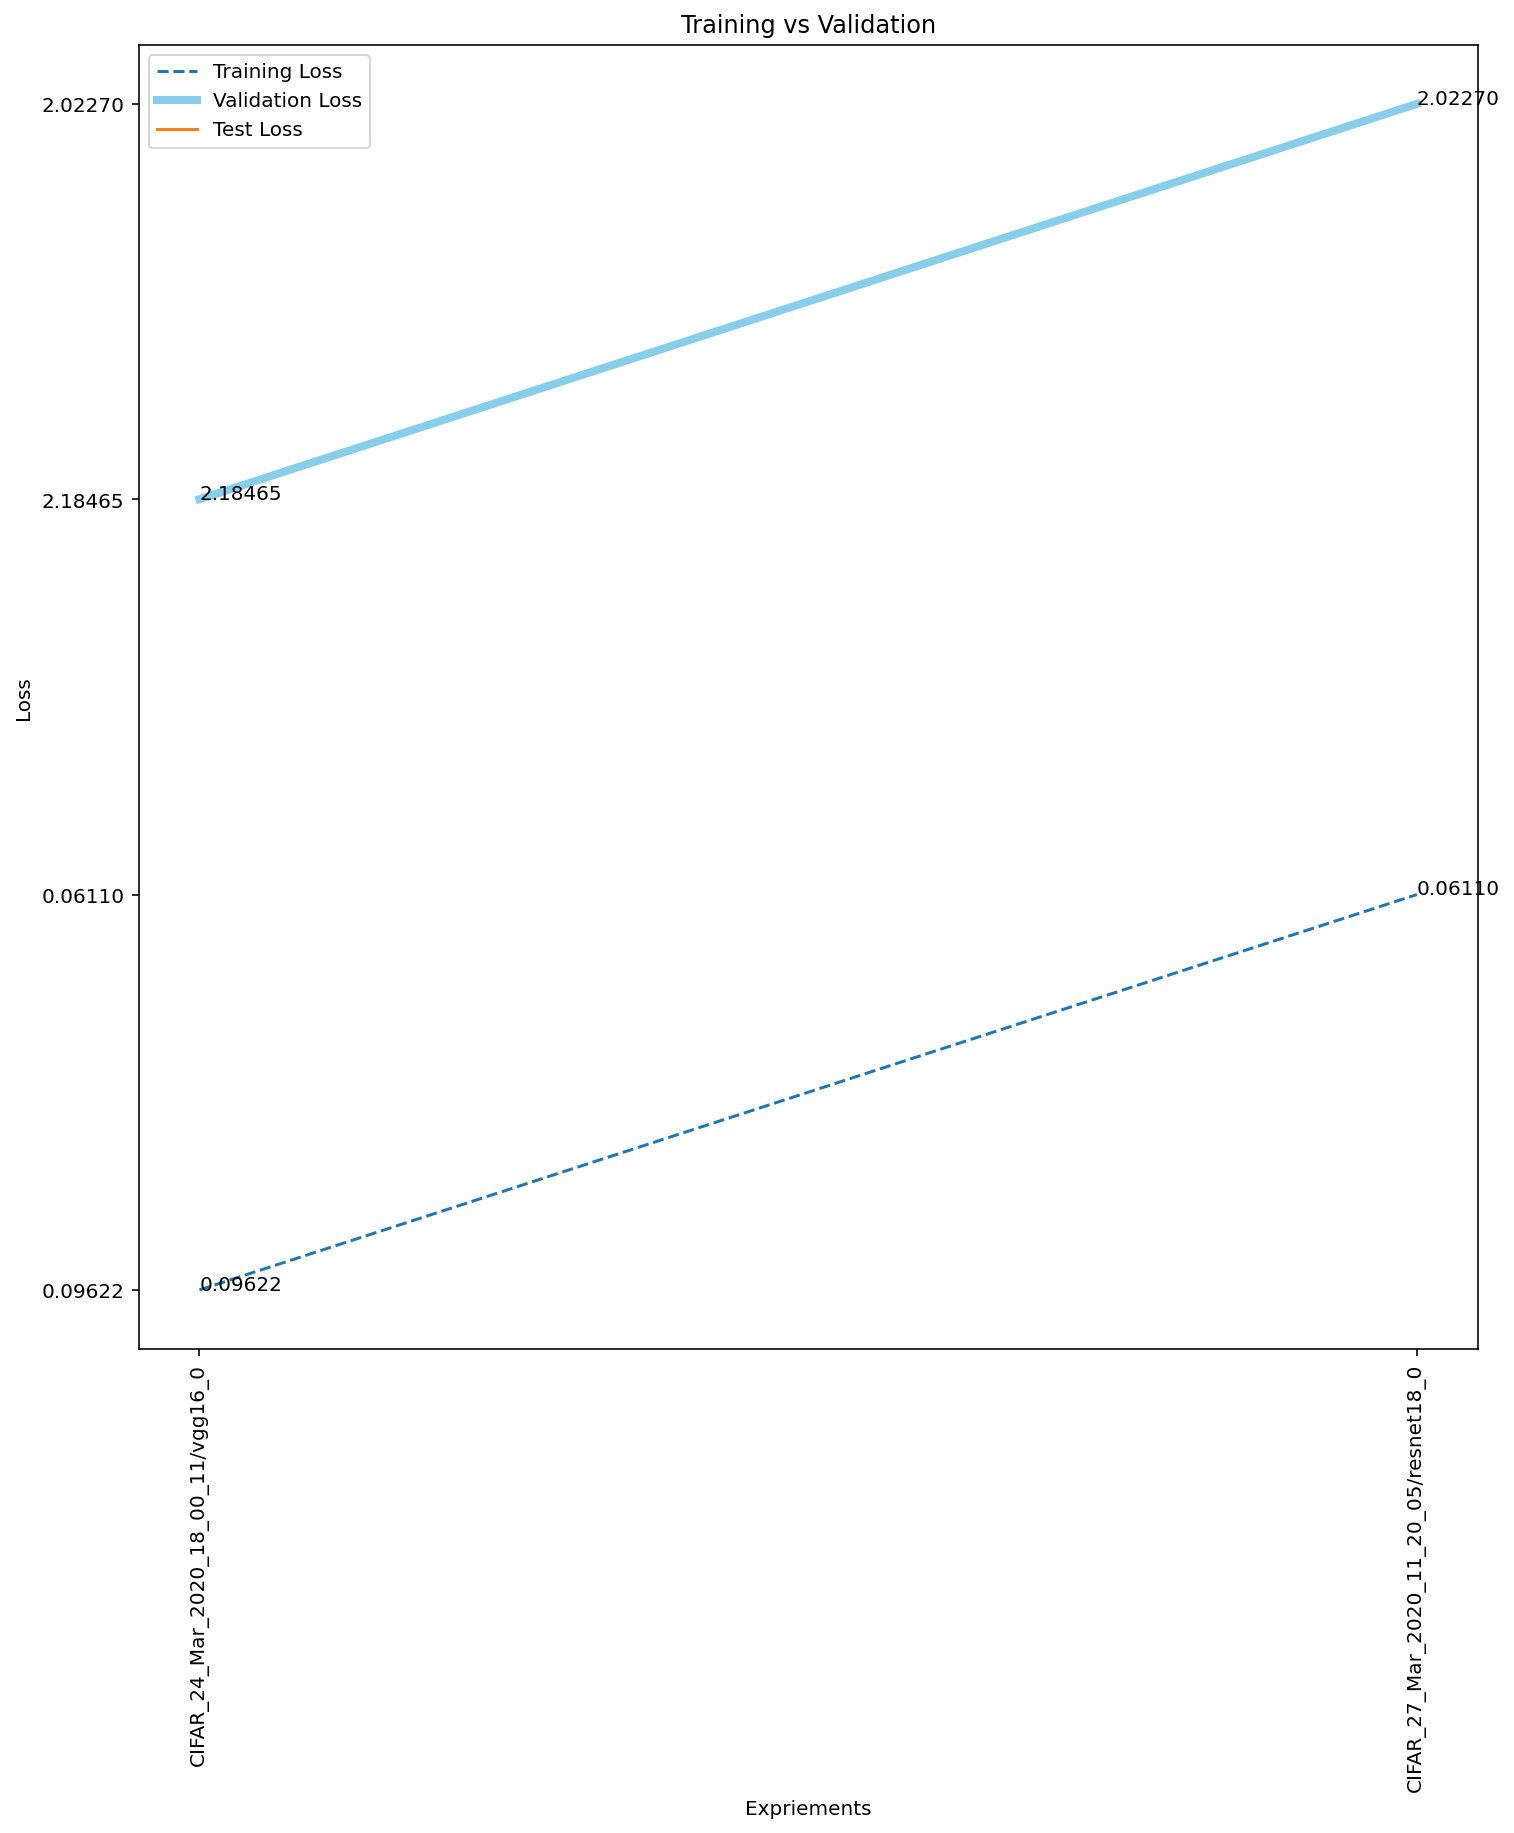

Starting Tunning With MinTrainLoss: 0.06109976819008589  MinValidLoss: 2.02270172059536
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
27_Mar_2020_20_21_46 : Resuming Experiment With New ID  27_Mar_2020_20_21_42
Loading Checkpoint from /content/gdrive/My Drive/Colab Notebooks/models/CIFAR/transferL/24_Mar_2020_18_00_11/vgg16/checkpoint_24_Mar_2020_18_28_37_0.pt...
	InputSize 		4096
	OutputSize 		10
	HiddenLayers 		VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padd

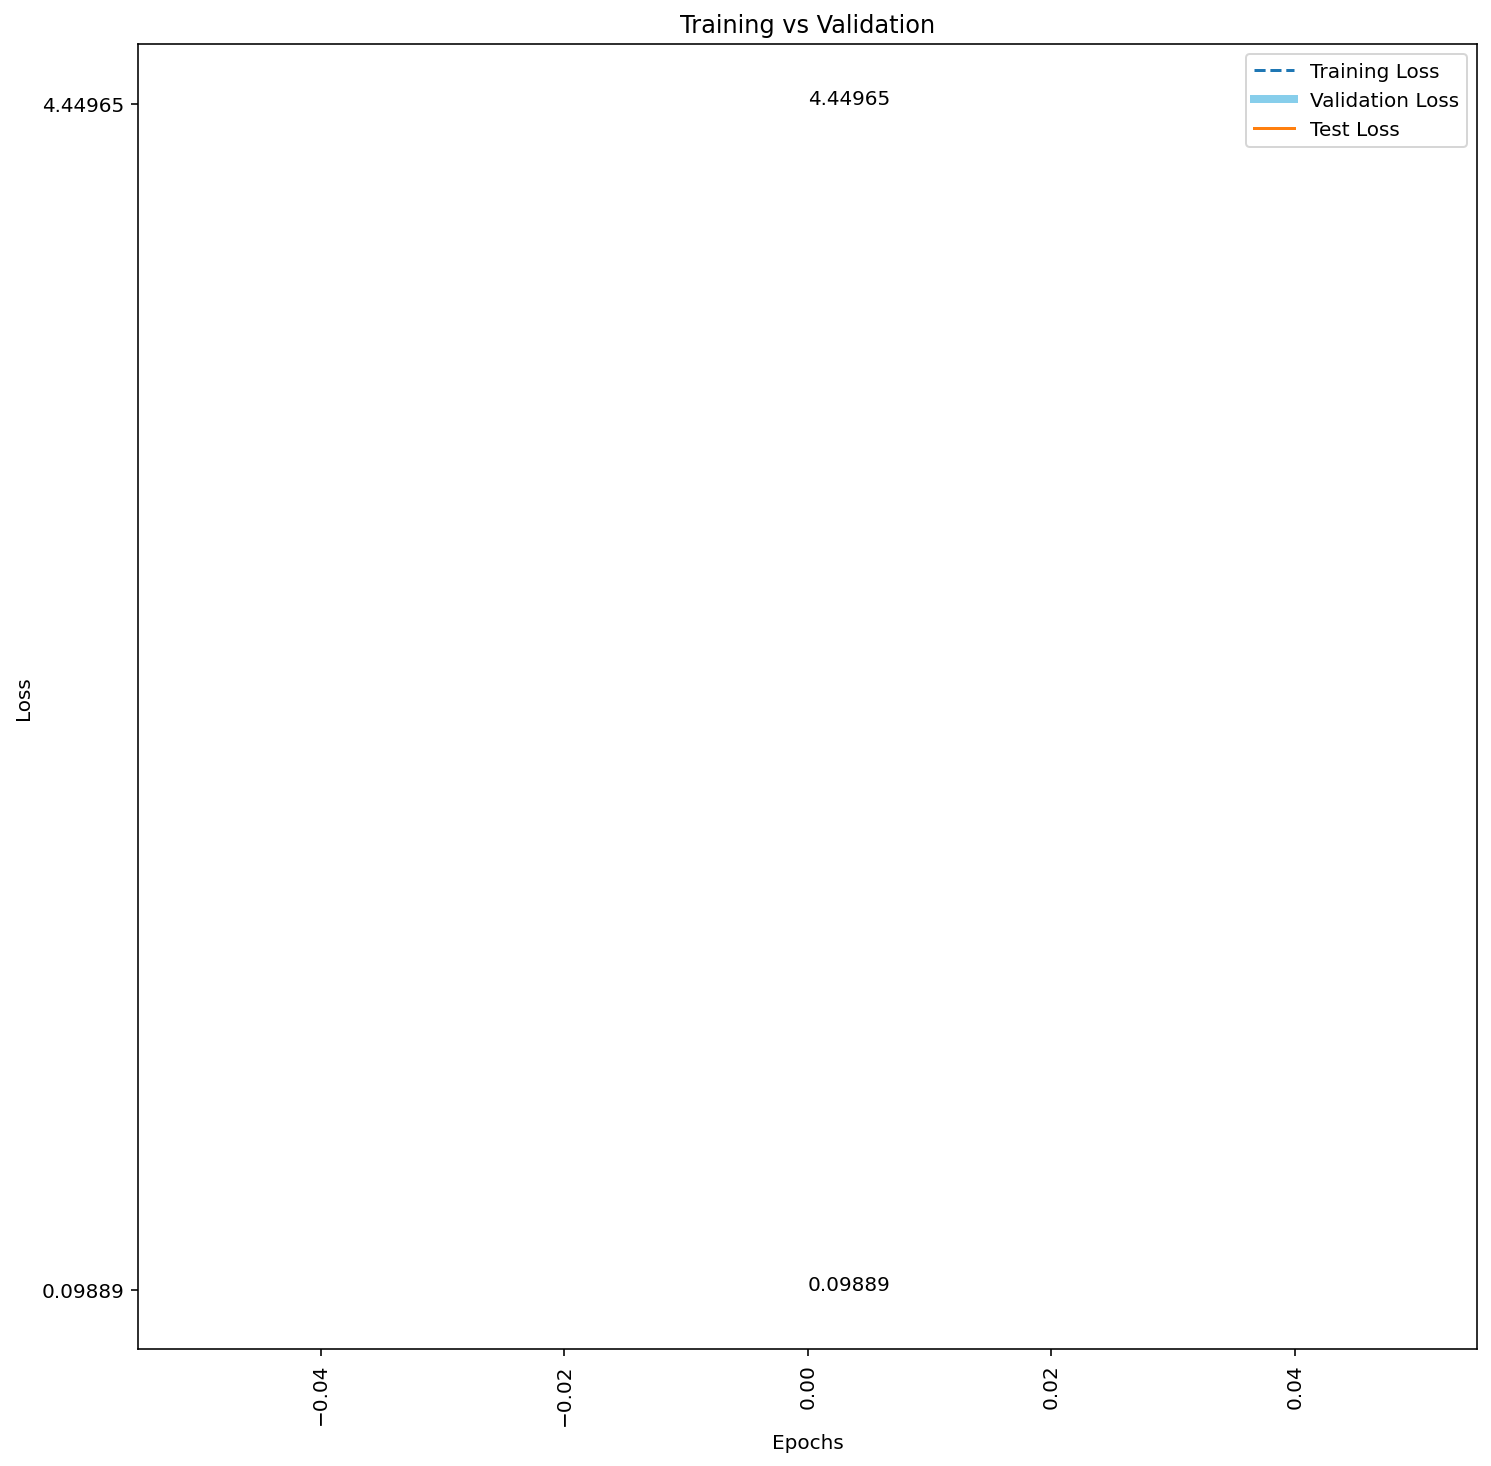

Starting Plotting Loss Trend Across All Experiements ....


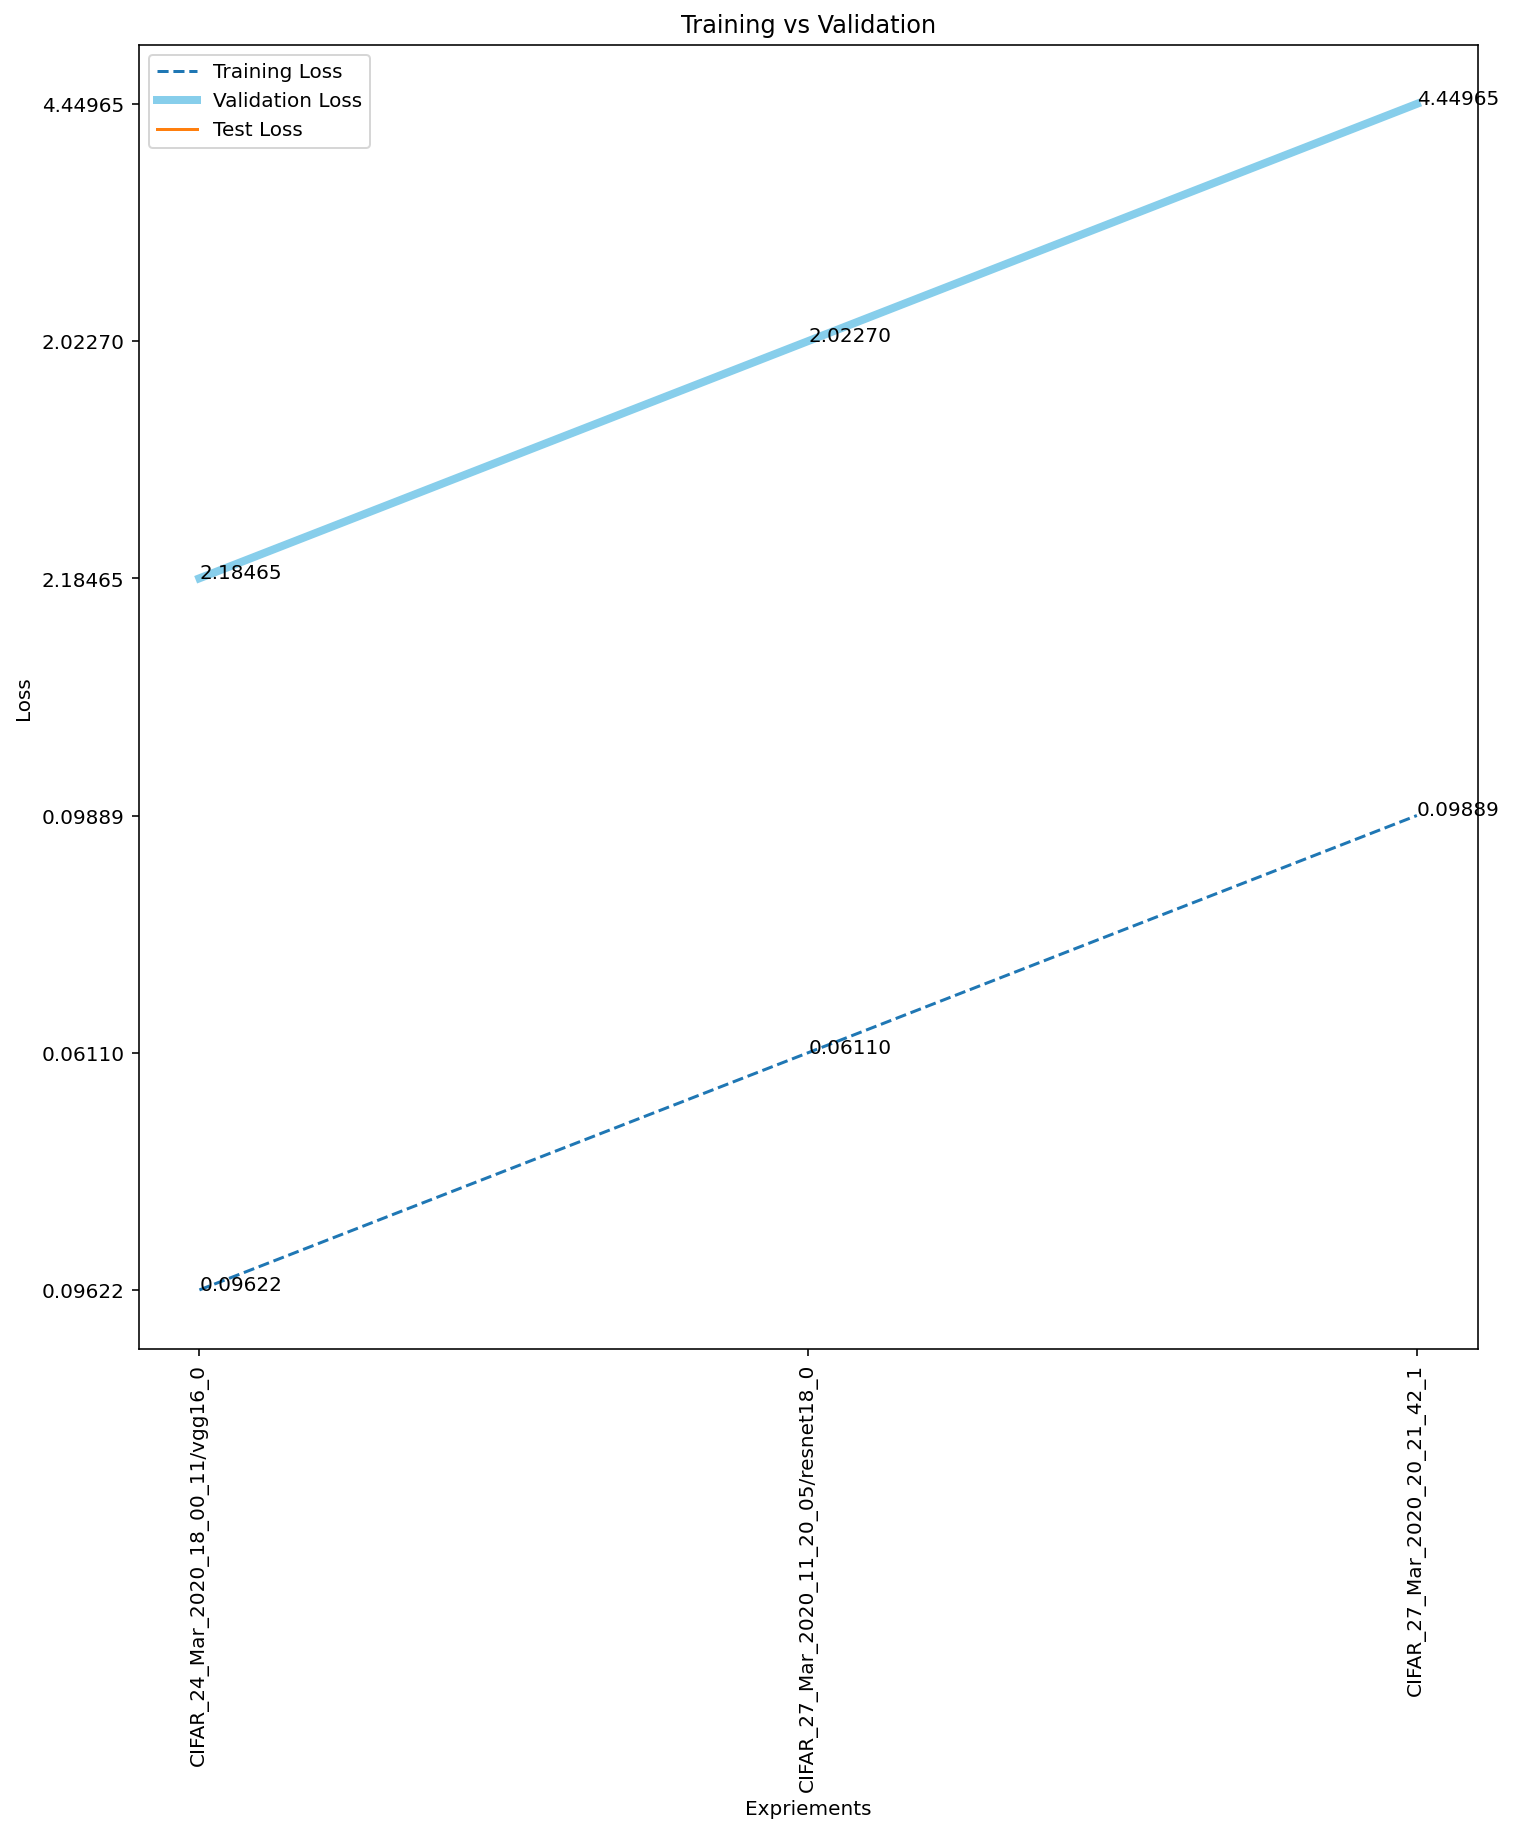

Start Global Counter: 1 Network Type:vgg11 EXP-ID:27_Mar_2020_20_21_42  DurationSinceStart : 0:06:20.531567  with hidden_layers: 4  hidden_layer_width: (2048, 2048, 2048, 2048)  Learning_Rate: 0.0001  drop_ratio: 0.8  replace_full_classifier: True
CUDA is available!  Using GPU ...
init Network with Type  vgg11
Original Model :  VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0,

RuntimeError: ignored

In [28]:
 tune_train_network('CIFAR',1,resumeExp=True,resume_logPath='/content/gdrive/My Drive/Colab Notebooks/models/CIFAR/CIFAR_logs/test.txt',resume_checkpointPath='/content/gdrive/My Drive/Colab Notebooks/models/CIFAR/transferL/',network_type='resenet')


In [0]:

from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout

""",'vgg11'-> model.classifier[0].in_features
'vgg11_bn'-> model.classifier[0].in_features
'vgg13' -> model.classifier[0].in_features
'vgg13_bn'-> model.classifier[0].in_features

'vgg16','vgg16_bn','vgg19','vgg19_bn',
                             'resnet18' ->model.fc.in_features
                             
                             ,'resnet34','resnet50','resnet101','resnet152',
                             'squeezenet1_0','squeezenet1_1', -> 512

                             'densenet121','densenet169','densenet161','densenet201', -> model.classifier.in_features
                             'inception_v3'
                            ]


model  = pretrained_models.squeezenet1_0(pretrained=True)
print(model)
#print(model.classifier.in_features)
"""

def test_pre_trained_mode():
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

  train_loader , valid_loader ,test_loader , classes , transform = LoadData('CIFAR',20,0.2,'resnet18')

  model = pretrained_models.vgg11(pretrained=True)

  print(model)
  # Freeze parameters so we don't backprop through them
  for param in model.parameters():
      param.requires_grad = False
      
  model.classifier[6] = nn.Linear(4096,10)
                     #nn.Sequential(nn.Linear(512, 1024),
                     #             nn.ReLU(),
                     #             nn.Dropout(0.2),
                     #             nn.Linear(1024, 10),
                     #             nn.LogSoftmax(dim=1))

  for param in model.classifier[6].parameters():
    param.requires_grad = True

  criterion = CrossEntropyLoss()
  #criterion = nn.NLLLoss()

  # Only train the classifier parameters, feature parameters are frozen
  optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)
  
  #checkpointPath = f'./results/CIFAR/'

  #Upload checkpoint to local drive
  #train_lossess , valid_lossess , checkpointt = train(model, train_loader, valid_loader, criterion, optimizer, False,checkpointPath,'',np.Inf,'start_time','exp_id',epochs=100)
                                                  
  
  model.to(device);

  epochs = 10
  steps = 0
  running_loss = 0
  print_every = 2
  for epoch in range(epochs):
      for inputs, labels in train_loader:
          steps += 1
          # Move input and label tensors to the default device
          inputs, labels = inputs.to(device), labels.to(device)
          
          optimizer.zero_grad()
          logps = model.forward(inputs)
          loss = criterion(logps, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
          
          if steps % print_every == 0:
              test_loss = 0
              accuracy = 0
              model.eval()
              with torch.no_grad():
                  for inputs, labels in test_loader:
                      inputs, labels = inputs.to(device), labels.to(device)
                      logps = model.forward(inputs)
                      batch_loss = criterion(logps, labels)
                      
                      test_loss += batch_loss.item()
                      
                      # Calculate accuracy
                      ps = torch.exp(logps)
                      top_p, top_class = ps.topk(1, dim=1)
                      equals = top_class == labels.view(*top_class.shape)
                      accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                      
              print(f"Epoch {epoch+1}/{epochs}.. "
                    f"Train loss: {running_loss/print_every:.3f}.. "
                    f"Test loss: {test_loss/len(test_loader):.3f}.. "
                    f"Test accuracy: {accuracy/len(test_loader):.3f}")
              running_loss = 0
              model.train()


#test_pre_trained_mode()